In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Daten laden
chicago_df = pd.read_csv('chicago_weather.csv')
munich_df = pd.read_csv('munich_weather.csv', sep=';', skipinitialspace=True)

chicago_df.head(), munich_df.head()

(   YEAR  MO  DY  HR  TEMP  PRCP   HMDT  WND_SPD  ATM_PRESS     REF
 0  2021   4   1   0  1.01  0.02  64.80     8.48     100.55  202104
 1  2021   4   1   1  0.56  0.05  65.69     8.71     100.58  202104
 2  2021   4   1   2  0.07  0.04  66.78     8.84     100.62  202104
 3  2021   4   1   3 -0.64  0.05  68.31     8.82     100.68  202104
 4  2021   4   1   4 -1.39  0.05  69.78     8.81     100.76  202104,
    STATIONS_ID  MESS_DATUM  QN_3     FX     FM  QN_4  RSK  RSKF    SDK  \
 0         3379    19540601  -999 -999.0 -999.0     1  0.0     1 -999.0   
 1         3379    19540602  -999 -999.0 -999.0     1  0.5     1 -999.0   
 2         3379    19540603  -999 -999.0 -999.0     1  0.0     1 -999.0   
 3         3379    19540604  -999 -999.0 -999.0     1  1.2     1 -999.0   
 4         3379    19540605  -999 -999.0 -999.0     1  6.0     1 -999.0   
 
    SHK_TAG     NM    VPM     PM   TMK    UPM   TXK   TNK    TGK  eor  
 0        0 -999.0 -999.0 -999.0  14.0 -999.0  17.6  10.4 -999.0  e

In [5]:
# Datumsspalten formatieren
chicago_df['DATE'] = pd.to_datetime(chicago_df[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1), errors='coerce')
munich_df['DATE'] = pd.to_datetime(munich_df['MESS_DATUM'], format='%Y%m%d', errors='coerce')

In [6]:
# Ungültige Werte aus Chicago-Daten entfernen
chicago_df = chicago_df[chicago_df['TEMP'] > -50]

In [7]:
# Tagesmitteltemperaturen und Niederschlag berechnen
chicago_daily = chicago_df.groupby('DATE').agg({'TEMP':'mean', 'PRCP':'sum'}).reset_index()
munich_daily = munich_df[['DATE', 'TMK', 'RSK']].dropna()

In [8]:
# Zeitraum angleichen
start_date = max(chicago_daily['DATE'].min(), munich_daily['DATE'].min())
end_date = min(chicago_daily['DATE'].max(), munich_daily['DATE'].max())

chicago_daily_clean = chicago_daily[(chicago_daily['DATE'] >= start_date) & (chicago_daily['DATE'] <= end_date)]
munich_daily_clean = munich_daily[(munich_daily['DATE'] >= start_date) & (munich_daily['DATE'] <= end_date)]

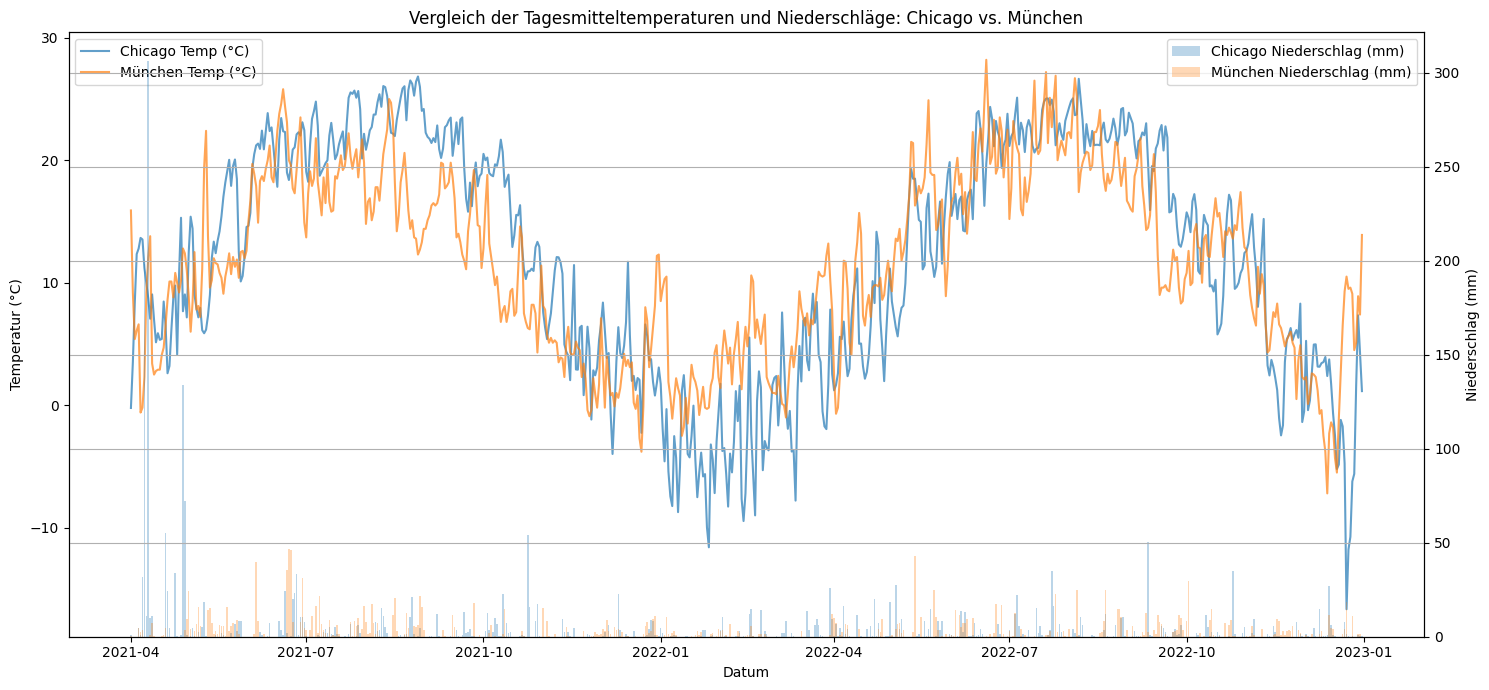

In [9]:
# Plot erstellen
fig, ax1 = plt.subplots(figsize=(15, 7))

# Temperatur
ax1.plot(chicago_daily_clean['DATE'], chicago_daily_clean['TEMP'], label='Chicago Temp (°C)', color='tab:blue', alpha=0.7)
ax1.plot(munich_daily_clean['DATE'], munich_daily_clean['TMK'], label='München Temp (°C)', color='tab:orange', alpha=0.7)
ax1.set_xlabel("Datum")
ax1.set_ylabel("Temperatur (°C)")
ax1.legend(loc='upper left')

# Niederschlag auf zweiter Achse
ax2 = ax1.twinx()
ax2.bar(chicago_daily_clean['DATE'], chicago_daily_clean['PRCP'], label='Chicago Niederschlag (mm)', color='tab:blue', alpha=0.3)
ax2.bar(munich_daily_clean['DATE'], munich_daily_clean['RSK'], label='München Niederschlag (mm)', color='tab:orange', alpha=0.3)
ax2.set_ylabel("Niederschlag (mm)")
ax2.legend(loc='upper right')

plt.title("Vergleich der Tagesmitteltemperaturen und Niederschläge: Chicago vs. München")
plt.grid(True)
plt.tight_layout()

plt.show()